# What is Pneumonia ?
From Mayo Clinic's Article on pneumonia

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

![download.png](attachment:download.png)

# Pneumonia Detection with Convolutional Neural Networks
Computer Vision can be realized using Convolutional neural networks (CNN) They are neural networks making features extraction over an image before classifying it. The feature extraction performed consists of three basic operations:

* Filter an image for a particular feature (convolution)
* Detect that feature within the filtered image (using the ReLU activation)
* Condense the image to enhance the features (maximum pooling)

# The convolution process is illustrated below

![download.png](attachment:download.png)

Using convolution filters with different dimensions or values results in differents features extracted

Features are then detected using the reLu activation on each destination pixel.

![download1.png](attachment:download1.png)

Features are the enhanced with MaxPool layers
![download2.png](attachment:download2.png)

The stride parameters determines the distance between each filters. The padding one determines if we ignore the borderline pixels or not (adding zeros helps the neural network to get information on the border)

![download3.png](attachment:download3.png)

The outputs are then concatened in Dense layers

![download4.png](attachment:download4.png)

By using a sigmoid activation, the neural network determines which class the image belongs to
![download5.png](attachment:download5.png)

#  Import Packages and Functions
We'll make use of the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization
* util will provide the locally defined utility functions that have been provided for this assignment
We will also use several modules from the keras framework for building deep learning models.

Run the next cell to import all the necessary packages.



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main/'
os.listdir(DATASET_PATH + "chest_xray")

['train', 'chest_xray', 'test', '__MACOSX', 'val', 'vindr']

In [ ]:
print('Notebook running: keras ', keras.__version__)

Notebook running: keras  2.6.0


In [ ]:
!pip3 install --upgrade tensorflow

In [ ]:
len(os.listdir(DATASET_PATH + "chest_xray/train/PNEUMONIA"))

3875

The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

# Data Visualization


Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=246
NORMAL=246


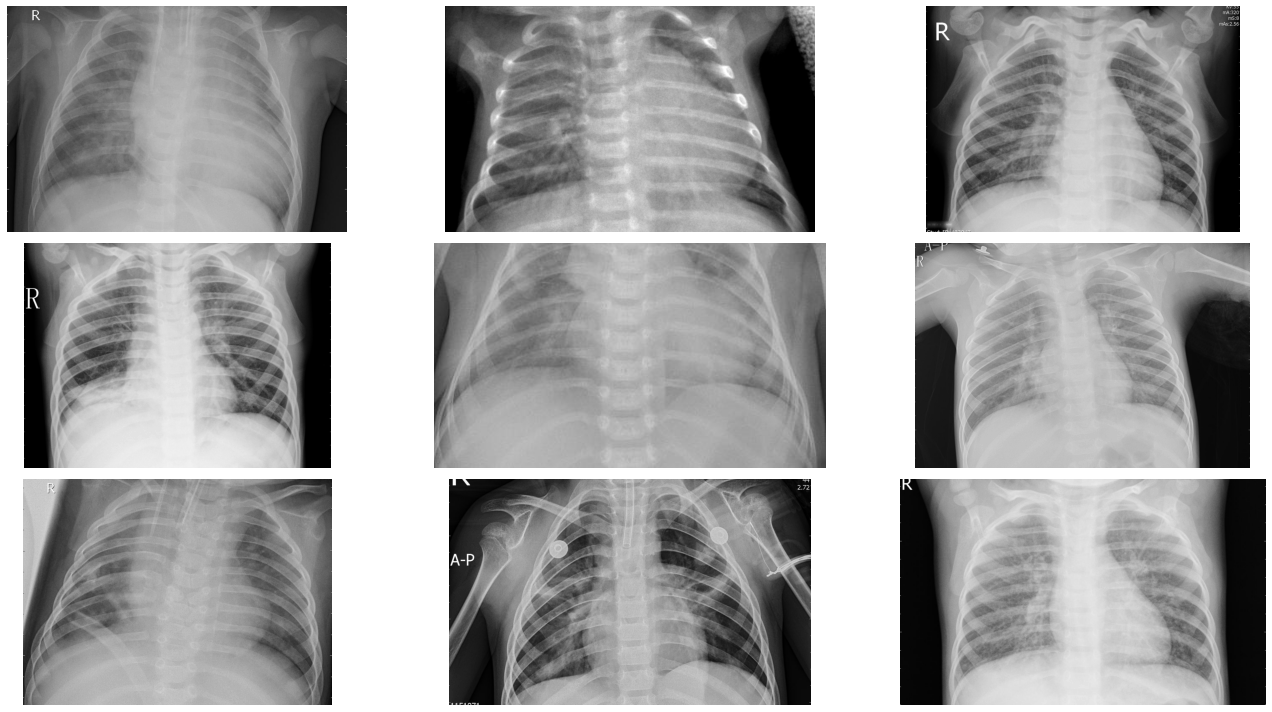

In [ ]:
train_dir = DATASET_PATH + "chest_xray/train"
test_dir = DATASET_PATH + "chest_xray/test"
val_dir = DATASET_PATH + "chest_xray/vindr"

print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir(DATASET_PATH + "chest_xray/train/PNEUMONIA")
pneumonia_dir = DATASET_PATH + "chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

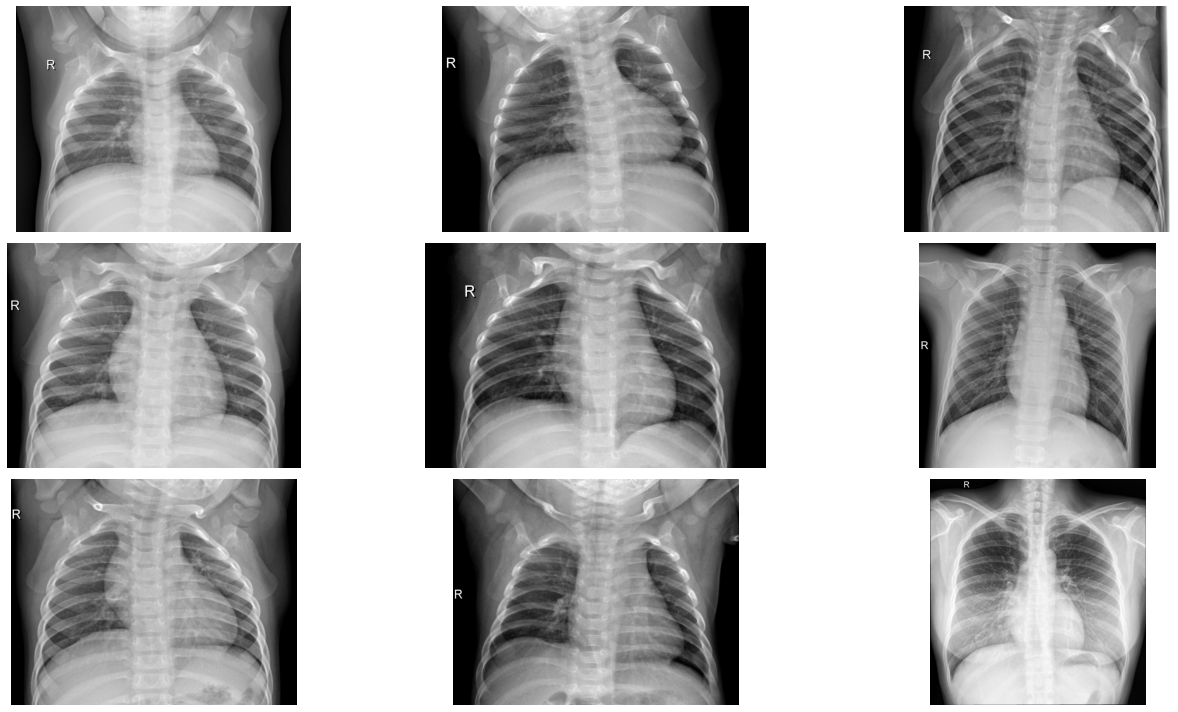

In [ ]:
normal = os.listdir(DATASET_PATH + "chest_xray/train/NORMAL")
normal_dir = DATASET_PATH + "chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 1480 pixels width and 1804 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 137.9402 and the standard deviation is 63.2597


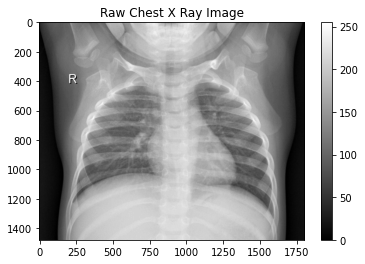

In [ ]:
normal_img = os.listdir(DATASET_PATH + "chest_xray/train/NORMAL")[0]
normal_dir = DATASET_PATH + "chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Ivestigate pixel value distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

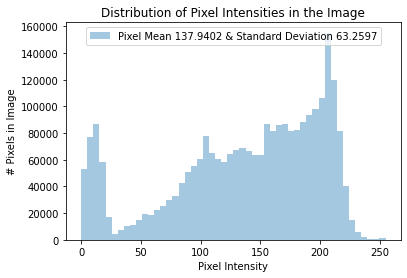

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
def save_model_history(  model_hist, model_name, path ):
    file = open(path + model_name + "_hist.csv", "w")
    w = csv.writer( file )
  
    for key, val in model_hist.history.items():
        w.writerow([key, val])
    
    file.close()
    print(path + model_name+"_DUO.h5")
    print("Model history saved to disk") 

def save_model( model, model_name, path ):
	# serialize model to JSON
    model_json = model.to_json()
    with open(path + model_name+"_DUO.json", "w") as json_file:
        json_file.write(model_json)
    json_file.close()

    # serialize weights to HDF5
    model.save_weights( path + model_name+"_DUO.h5")
    print("Saving files:")
    print(path + model_name+"_DUO.json")
    print(path + model_name+"_DUO.h5")
    print("Model saved to disk") 



# 2. Image Preprocessing
Before training, we'll first modify your images to be better suited for training a convolutional neural network. For this task we'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images.
We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution).
The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Build a separate generator fo valid and test sets

Now we need to build a new generator for validation and t esting data.

Why can't use the same generator as for the training data?

Look back at the generator we wrote for the training data.

It normalizes each image per batch, meaning thatit uses batch statistics.
We should not do this with the test and validation data, since in a real life scenario we don't process incoming images a batch at a time (we process one image at a time).
Knowing the average per batch of test data would effectively give our model an advantage (The model should not have any information about the test data).
What we need to do is to normalize incomming test data using the statistics computed from the training set.

In [ ]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 5216 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 2.6061 and the minimum is -2.7531
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


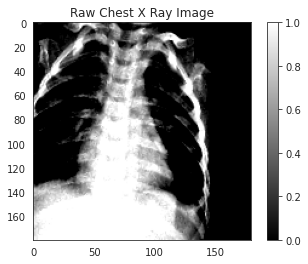

In [ ]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

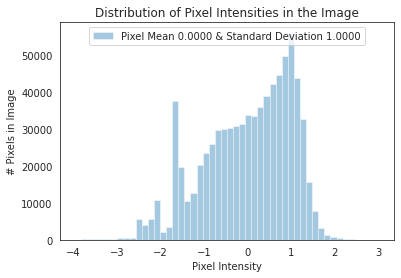

In [ ]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# Building a CNN model

## Impact of imbalance data on loss function

Loss Function:
$$\mathcal{L}_{cross-entropy}(x_i) = -(y_i \log(f(x_i)) + (1-y_i) \log(1-f(x_i))),$$

We can rewrite the the overall average cross-entropy loss over the entire training set `D` of size `N` as follows:
$$\mathcal{L}_{cross-entropy}(\mathcal{D}) = - \frac{1}{N}\big( \sum_{\text{positive examples}} \log (f(x_i)) + \sum_{\text{negative examples}} \log(1-f(x_i)) \big).$$



When we have an imbalance data, using a normal loss function will result a model that bias toward the dominating class. One solution is to use a weighted loss function. Using weighted loss function will balance the contribution in the loss function.

$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

In [ ]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 176, 176, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 86, 86, 64)        2

In [ ]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10
100/100 [==============================] - 204s 2s/step - loss: 1.0312 - accuracy: 0.8012 - val_loss: 75.4089 - val_accuracy: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 157s 2s/step - loss: 0.4090 - accuracy: 0.8475 - val_loss: 47.3029 - val_accuracy: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 126s 1s/step - loss: 0.1973 - accuracy: 0.8712 - val_loss: 42.5211 - val_accuracy: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 110s 1s/step - loss: 0.1357 - accuracy: 0.8925 - val_loss: 10.3338 - val_accuracy: 0.0800
Epoch 5/10
100/100 [==============================] - 92s 916ms/step - loss: 0.1002 - accuracy: 0.9125 - val_loss: 14.2643 - val_accuracy: 0.0000e+00
Epoch 6/10
100/100 [==============================] - 80s 798ms/step - loss: 0.1546 - accuracy: 0.8913 - val_loss: 4.7811 - val_accuracy: 0.3200
Epoch 7/10
100/100 [==============================] - 71s 705ms/step - loss: 0.1239 - accuracy: 0.9062 - val_loss: 6.

Text(0.5, 1.0, 'Accuracy Evolution')

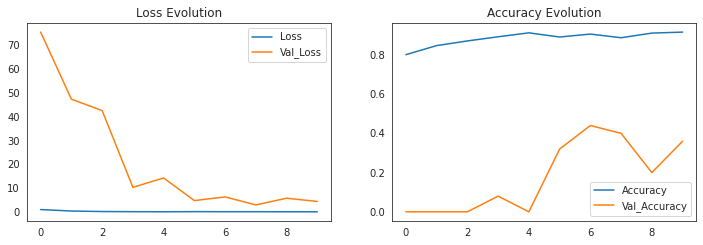

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 124s 198ms/step - loss: 0.5990 - accuracy: 0.7949
Test Accuracy: 79.49%
652/652 [==============================] - 299s 460ms/step - loss: 0.1731 - accuracy: 0.9417
Train Accuracy: 94.17%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[127 107]
 [ 14 376]]


,0,1,accuracy,macro avg,weighted avg
precision,0.900709,0.778468,0.80609,0.839589,0.824308
recall,0.542735,0.964103,0.80609,0.753419,0.806090
f1-score,0.677333,0.861397,0.80609,0.769365,0.792373
support,234.000000,390.000000,0.80609,624.000000,624.000000


In [ ]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[165  69]
 [ 32 358]]


,0,1,accuracy,macro avg,weighted avg
precision,0.837563,0.838407,0.838141,0.837985,0.838091
recall,0.705128,0.917949,0.838141,0.811538,0.838141
f1-score,0.765661,0.876377,0.838141,0.821019,0.834859
support,234.000000,390.000000,0.838141,624.000000,624.000000


In [ ]:
# save model 
import csv
IMAGE_SIZE = 180
PATH = '/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main/'
TRAINED = False

if not TRAINED:
  save_model_history(  r, '/final_hist_sequential_'+str(IMAGE_SIZE), PATH )
  save_model( model, '/final_sequential_'+str(IMAGE_SIZE), PATH)

/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_hist_sequential_180_DUO.h5
Model history saved to disk
Saving files:
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_sequential_180_DUO.json
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_sequential_180_DUO.h5
Model saved to disk


# Transfer Learning
# DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

![download.png](attachment:download.png)

for more information about the DenseNet Architecture visit this website : https://keras.io/api/applications/densenet/


In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 186, 186, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 90, 90, 64)   9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [ ]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_6'), name='input_6', description="created by layer 'input_6'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [ ]:

#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
r = model.fit(
    train, 
    epochs=50,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/50
100/100 [==============================] - 24s 242ms/step - loss: 0.0872 - accuracy: 0.9087 - val_loss: 0.8497 - val_accuracy: 0.6800
Epoch 2/50
100/100 [==============================] - 24s 236ms/step - loss: 0.1063 - accuracy: 0.8838 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 3/50
100/100 [==============================] - 24s 241ms/step - loss: 0.0646 - accuracy: 0.9275 - val_loss: 2.3092 - val_accuracy: 0.2400
Epoch 4/50
100/100 [==============================] - 24s 239ms/step - loss: 0.0523 - accuracy: 0.9463 - val_loss: 3.5828 - val_accuracy: 0.2400
Epoch 5/50
100/100 [==============================] - 23s 233ms/step - loss: 0.0640 - accuracy: 0.9400 - val_loss: 0.4367 - val_accuracy: 0.7600
Epoch 6/50
100/100 [==============================] - 24s 240ms/step - loss: 0.0895 - accuracy: 0.9125 - val_loss: 1.2687 - val_accuracy: 0.6000
Epoch 7/50
100/100 [==============================] - 23s 231ms/step - loss: 0.0771 - accuracy: 0.9212 - val_loss: 1.6666 - val_ac

Text(0.5, 1.0, 'Accuracy Evolution')

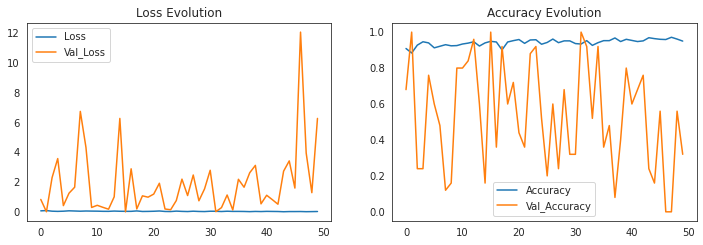

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 26s 41ms/step - loss: 0.6538 - accuracy: 0.7163
Test Accuracy: 71.63%
 58/652 [=>............................] - ETA: 1:51 - loss: 0.8927 - accuracy: 0.6078

KeyboardInterrupt: ignored

In [ ]:
if not TRAINED:
  save_model_history(  r, '/final_hist_DenseNet_'+str(IMAGE_SIZE), PATH )
  save_model( model, '/final_DenseNet_'+str(IMAGE_SIZE), PATH)

/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_hist_DenseNet_180_DUO.h5
Model history saved to disk
Saving files:
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_DenseNet_180_DUO.json
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_DenseNet_180_DUO.h5
Model saved to disk


# Evaluation

In [ ]:
predicted_vals = model.predict(test, steps=len(test))

In [ ]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[232   2]
 [152 238]]


,0,1,accuracy,macro avg,weighted avg
precision,0.604167,0.991667,0.753205,0.797917,0.846354
recall,0.991453,0.610256,0.753205,0.800855,0.753205
f1-score,0.750809,0.755556,0.753205,0.753182,0.753776
support,234.000000,390.000000,0.753205,624.000000,624.000000


# VGG16
Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

![download7.png](attachment:download7.png)

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D



vgg16_base_model =  keras.applications.VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

    


58900480/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [ ]:


vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])
    
model = Sequential()
model.add(vgg16_model.layers[0])


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)



Epoch 1/10
100/100 [==============================] - 33s 263ms/step - loss: 0.2407 - accuracy: 0.7075 - precision: 0.9253 - recall: 0.6542 - val_loss: 2.9433e-07 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 25s 249ms/step - loss: 0.1943 - accuracy: 0.7500 - precision: 0.9424 - recall: 0.7187 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 27s 269ms/step - loss: 0.2096 - accuracy: 0.7575 - precision: 0.9073 - recall: 0.7360 - val_loss: 5.9082 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 25s 253ms/step - loss: 0.1892 - accuracy: 0.7625 - precision: 0.9209 - recall: 0.7380 - val_loss: 16.5768 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
100/100 [=======================

Text(0.5, 1.0, 'Accuracy Evolution')

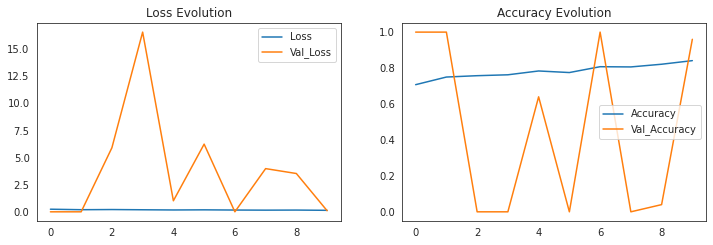

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')   
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 21s 33ms/step - loss: 3.1892 - accuracy: 0.3862 - precision: 1.0000 - recall: 0.0179
Test Accuracy: 38.62%
652/652 [==============================] - 126s 193ms/step - loss: 3.9415 - accuracy: 0.2832 - precision: 1.0000 - recall: 0.0351
Train Accuracy: 28.32%


In [ ]:
predicted_vals = vgg16_model.predict(test, steps=len(test))

In [ ]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[234   0]
 [384   6]]


,0,1,accuracy,macro avg,weighted avg
precision,0.378641,1.000000,0.384615,0.689320,0.766990
recall,1.000000,0.015385,0.384615,0.507692,0.384615
f1-score,0.549296,0.030303,0.384615,0.289799,0.224925
support,234.000000,390.000000,0.384615,624.000000,624.000000


In [ ]:

if not TRAINED:
  save_model_history(  r, '/final_hist_vgg16_'+str(IMAGE_SIZE), PATH )
  save_model( model, '/final_vgg16_'+str(IMAGE_SIZE), PATH)

/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_hist_vgg16_180_DUO.h5
Model history saved to disk
Saving files:
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_vgg16_180_DUO.json
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_vgg16_180_DUO.h5
Model saved to disk


# ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [ ]:
!pip install resnet

In [ ]:
#from keras.applications.ResNet50 import ResNet50

resnet_base_model = keras.applications.ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')



94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
resnet_model = Sequential([
    resnet_base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.6),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64,activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1,activation="sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
resnet_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = resnet_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)


Epoch 1/10
100/100 [==============================] - 37s 276ms/step - loss: 0.2266 - accuracy: 0.6988 - precision: 0.9095 - recall: 0.6458 - val_loss: 0.0376 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 26s 257ms/step - loss: 0.2599 - accuracy: 0.6712 - precision: 0.8680 - recall: 0.6650 - val_loss: 2.5985 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 25s 247ms/step - loss: 0.2467 - accuracy: 0.6500 - precision: 0.8637 - recall: 0.6432 - val_loss: 3.8540 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 25s 253ms/step - loss: 0.2894 - accuracy: 0.6450 - precision: 0.8225 - recall: 0.6529 - val_loss: 2.0284 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
100/100 [============================

Text(0.5, 1.0, 'Accuracy Evolution')

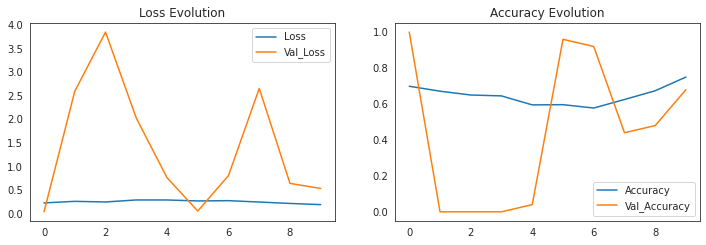

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 23s 37ms/step - loss: 2.3089 - accuracy: 0.5497 - precision: 0.9360 - recall: 0.3000
Test Accuracy: 54.97%
652/652 [==============================] - 152s 232ms/step - loss: 2.9916 - accuracy: 0.4498 - precision: 0.9864 - recall: 0.2630
Train Accuracy: 44.98%


In [ ]:
predicted_vals = resnet_model.predict(test, steps=len(test))
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[231   3]
 [268 122]]


,0,1,accuracy,macro avg,weighted avg
precision,0.462926,0.976000,0.565705,0.719463,0.783597
recall,0.987179,0.312821,0.565705,0.650000,0.565705
f1-score,0.630286,0.473786,0.565705,0.552036,0.532474
support,234.000000,390.000000,0.565705,624.000000,624.000000


In [ ]:

if not TRAINED:
  save_model_history(  r, '/final_hist_ResNet_'+str(IMAGE_SIZE), PATH )
  save_model( model, '/final_ResNet_'+str(IMAGE_SIZE), PATH)

/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_hist_ResNet_180_DUO.h5
Model history saved to disk
Saving files:
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_ResNet_180_DUO.json
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_ResNet_180_DUO.h5
Model saved to disk


# InceptionNet
Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters

for more information visit https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf



In [ ]:
#from keras.applications import InceptionV3

inception_base_model =  keras.applications.InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')



87924736/87910968 [==============================] - 2s 0us/step


In [ ]:
inception_model = Sequential([
    inception_base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.6),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64,activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1,activation="sigmoid")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
inception_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = inception_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)


Epoch 1/10
100/100 [==============================] - 40s 270ms/step - loss: 0.2206 - accuracy: 0.7063 - precision: 0.8949 - recall: 0.6684 - val_loss: 0.3017 - val_accuracy: 0.8800 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 24s 237ms/step - loss: 0.1765 - accuracy: 0.8025 - precision: 0.9429 - recall: 0.7804 - val_loss: 0.2155 - val_accuracy: 0.8800 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 24s 237ms/step - loss: 0.1851 - accuracy: 0.7763 - precision: 0.9358 - recall: 0.7457 - val_loss: 6.3353e-04 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 24s 243ms/step - loss: 0.1778 - accuracy: 0.7788 - precision: 0.9221 - recall: 0.7578 - val_loss: 3.9440 - val_accuracy: 0.2000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
100/100 [==============================] - 24

Text(0.5, 1.0, 'Accuracy Evolution')

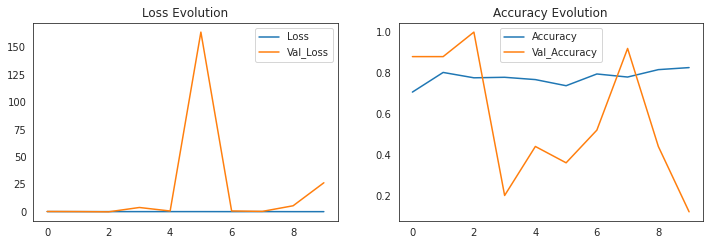

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 25s 39ms/step - loss: 1.7761 - accuracy: 0.7436 - precision: 0.7273 - recall: 0.9436
Test Accuracy: 74.36%
652/652 [==============================] - 130s 199ms/step - loss: 0.6323 - accuracy: 0.8196 - precision: 0.8309 - recall: 0.9507
Train Accuracy: 81.96%


In [ ]:
predicted_vals = inception_model.predict(test, steps=len(test))
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[ 94 140]
 [ 27 363]]


,0,1,accuracy,macro avg,weighted avg
precision,0.776860,0.721670,0.732372,0.749265,0.742366
recall,0.401709,0.930769,0.732372,0.666239,0.732372
f1-score,0.529577,0.812990,0.732372,0.671284,0.706710
support,234.000000,390.000000,0.732372,624.000000,624.000000


In [ ]:

if not TRAINED:
  save_model_history(  r, '/final_hist_inceptionNet_'+str(IMAGE_SIZE), PATH )
  save_model( model, '/final_inceptionNet_'+str(IMAGE_SIZE), PATH)

/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_hist_inceptionNet_180_DUO.h5
Model history saved to disk
Saving files:
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_inceptionNet_180_DUO.json
/content/drive/MyDrive/Colab Notebooks/Data/Pneumonia-Detection-using-Deep-Learning-main//final_inceptionNet_180_DUO.h5
Model saved to disk


## Comparing different models

In [ ]:
#model_mae_scores_dict = {'CNN': 91.98, 'CNN_2': 68.91, 'DenseNet' : 87.18, 'VGG16' : 66.19, 'ResNet' : 73.40, 'InceptionNet' : 76.76}

In [ ]:
model_mae_scores = pd.Series(model_mae_scores_dict)

In [ ]:
model_mae_scores

In [ ]:
order = model_mae_scores.sort_values()

In [ ]:
from matplotlib import pyplot
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=order.values, y = order.index, orient='h')

plt.xlabel('Mean Absolute Error')
plt.xticks(rotation='vertical',fontsize=14)
plt.title('Mean Average Error of All Models Tested')